In [125]:
# Loading the necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### 1. Exploring the NYC AirBnB Data

- Loading the data

In [126]:
price_dataset = pd.read_csv("airbnb_price.csv", index_col="listing_id")
last_review = pd.read_csv("airbnb_last_review.csv")
room_type = pd.read_excel("airbnb_room_type.xlsx", index_col="listing_id")

In [127]:
# Removing leading whitespaces from the " listing_id" column then make it the index column
last_review.columns

Index([' listing_id', 'host_name', 'last_review'], dtype='object')

In [128]:
last_review.columns = last_review.columns.str.strip()

In [129]:
# Now using the stripped col as the index col 
last_review.set_index("listing_id", inplace=True)

In [130]:
last_review.shape

(25209, 2)

In [131]:
price_dataset.shape

(25209, 2)

In [132]:
room_type.shape

(25209, 2)

In [133]:
room_type.head()

,description,room_type
listing_id,,
2595,Skylit Midtown Castle,Entire home/apt
3831,Cozy Entire Floor of Brownstone,Entire home/apt
5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
5178,Large Furnished Room Near B'way,private room
5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


- The dataframes have an equal number of rows and a common index column - "listing_id"

In [134]:
final_dataset = price_dataset.join(room_type).join(last_review)
final_dataset.head(10)

,price,nbhood_full,description,room_type,host_name,last_review
listing_id,,,,,,
2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019
5295,135 dollars,"Manhattan, Upper West Side",Beautiful 1br on Upper West Side,Entire home/apt,Lena,June 22 2019
5441,85 dollars,"Manhattan, Hell's Kitchen",Central Manhattan/near Broadway,Private room,Kate,June 23 2019
5803,89 dollars,"Brooklyn, South Slope","Lovely Room 1, Garden, Best Area, Legal rental",Private room,Laurie,June 24 2019
6021,85 dollars,"Manhattan, Upper West Side",Wonderful Guest Bedroom in Manhattan for SINGLES,Private room,Claudio,July 05 2019


- Is there any missing data in the dataset?

In [135]:
final_dataset.isnull().sum()

price           0
nbhood_full     0
description    10
room_type       0
host_name       8
last_review     0
dtype: int64

In [136]:
# Looking at the missing subset of the data
missing_df = final_dataset[final_dataset.description.isnull()] 
missing_df

,price,nbhood_full,description,room_type,host_name,last_review
listing_id,,,,,,
7851219,60 dollars,"Brooklyn, Williamsburg",NaN,PRIVATE ROOM,John,June 18 2019
7854307,60 dollars,"Brooklyn, Williamsburg",NaN,private room,John,June 15 2019
7858673,60 dollars,"Brooklyn, Williamsburg",NaN,Private room,John,June 08 2019
7873655,60 dollars,"Brooklyn, Williamsburg",NaN,PRIVATE ROOM,John,June 21 2019
7886635,60 dollars,"Brooklyn, Williamsburg",NaN,Private room,John,June 18 2019
7901635,60 dollars,"Brooklyn, Williamsburg",NaN,Private room,John,June 23 2019
8192443,60 dollars,"Brooklyn, Williamsburg",NaN,private room,John,June 23 2019
8341556,55 dollars,"Manhattan, Harlem",NaN,Private room,Gordon M,May 26 2019
9698992,62 dollars,"Manhattan, Harlem",NaN,private room,Gordon M,June 14 2019


In [137]:
missing_df2 = final_dataset[final_dataset.host_name.isnull()]
missing_df2

,price,nbhood_full,description,room_type,host_name,last_review
listing_id,,,,,,
100184,50 dollars,"Queens, Queens Village",Bienvenue,private room,NaN,July 08 2019
4183989,86 dollars,"Manhattan, Harlem",SPRING in the City!! Zen-Style Tranquil Bedroom,Private room,NaN,May 23 2019
6292866,85 dollars,"Brooklyn, East Flatbush",Modern Quiet Gem Near All,entire home/apt,NaN,June 19 2019
6786181,100 dollars,"Brooklyn, East Flatbush",R&S Modern Spacious Hideaway,Entire home/apt,NaN,June 19 2019
12113879,220 dollars,"Manhattan, Chelsea","Sunny, Large West Village 1 BR Near Everything",Entire home/apt,NaN,July 02 2019
15648096,75 dollars,"Bronx, Highbridge",Spacious 2 bedroom close to Manhattan,Entire home/apt,NaN,July 07 2019
21867710,120 dollars,"Manhattan, Hell's Kitchen",Amazing room in the centre on Manhatten! Welcome!,Private room,NaN,January 01 2019
21901156,120 dollars,"Manhattan, Hell's Kitchen",Best Deal! Lovely place in Manhattan! Time Squ...,Private room,NaN,January 01 2019


- The subset of the dataset with missing values is insignificant (around 18 rows) so we drop these rows

In [138]:
dropped_df = final_dataset.dropna(subset=["description", "host_name"], inplace=True)
final_dataset.isnull().sum()

price          0
nbhood_full    0
description    0
room_type      0
host_name      0
last_review    0
dtype: int64

In [139]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25191 entries, 2595 to 36455809
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        25191 non-null  object
 1   nbhood_full  25191 non-null  object
 2   description  25191 non-null  object
 3   room_type    25191 non-null  object
 4   host_name    25191 non-null  object
 5   last_review  25191 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


- We want to clean the price column such that we strip the "dollars" part
- We shall do so by extracting the numeric part of the string and converting it to float

In [140]:
# Extracting the numeric part of the string 
final_dataset["price"] = final_dataset.price.str.extract("(\d+)").astype("float")
final_dataset.head()

,price,nbhood_full,description,room_type,host_name,last_review
listing_id,,,,,,
2595,225.0,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
3831,89.0,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
5099,200.0,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
5178,79.0,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
5238,150.0,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019


In [142]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25191 entries, 2595 to 36455809
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        25191 non-null  float64
 1   nbhood_full  25191 non-null  object 
 2   description  25191 non-null  object 
 3   room_type    25191 non-null  object 
 4   host_name    25191 non-null  object 
 5   last_review  25191 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


- Looking at some summary statistics 

In [145]:
# Summary statistics
final_dataset.describe()

,price
count,25191.000000
mean,141.816998
std,147.389669
min,0.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,7500.000000


<Axes: xlabel='price', ylabel='Count'>

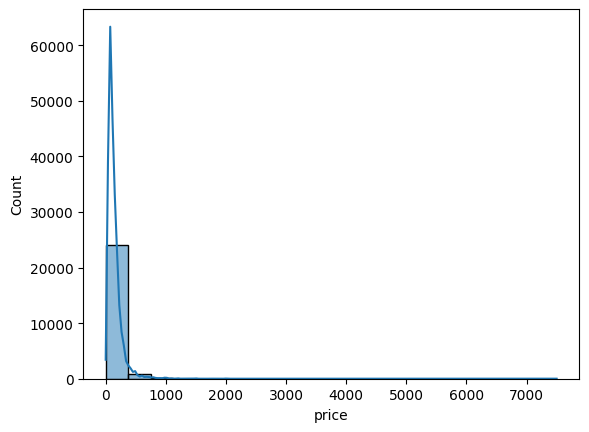

In [147]:
sns.histplot(final_dataset, x="price", bins=20, kde=True)